In [2]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# 2 Sample t-test for testing for the differences in means: Independent t-test

It is known that smoking is associated with chronic obstructive pulmaonary disease.  Research has shown that this process is linked with a number of inflammatory signatures in exhaled breath condensate (EBC), one of which is nitrite concentration. Average nitrate EBC concentration was collected from eleven nonsmokers and nine smokers.   

Determine whether there is a significant difference in the mean nitrite EBC concentration between smokers and non-smokers, using a confidence level of 95%. 

Load and explore the data

In [3]:
Nonsmokers=pd.Series([15723, 18990, 7597, 24160, 12044, 17636, 19792, 24945, 21372, 19271, 22804])
Smokers=pd.Series([24960, 31210, 28234, 17786, 30612, 25944, 19437, 16945, 23434])

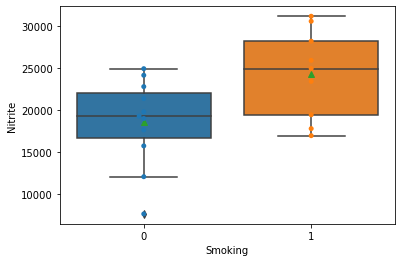

In [4]:
# Plot the data to visualize
ax=sns.boxplot(data=[Nonsmokers,Smokers],showmeans=True)
ax.set(xlabel="Smoking")
ax.set(ylabel="Nitrite")
ax=sns.swarmplot(data=[Nonsmokers,Smokers])

In [5]:
Nonsmokers.describe()

count       11.000000
mean     18575.818182
std       5213.449603
min       7597.000000
25%      16679.500000
50%      19271.000000
75%      22088.000000
max      24945.000000
dtype: float64

In [6]:
Smokers.describe()

count        9.000000
mean     24284.666667
std       5328.331892
min      16945.000000
25%      19437.000000
50%      24960.000000
75%      28234.000000
max      31210.000000
dtype: float64

By default numpy uses a maximum likelihood estimate for the standard deviation (degrees of freedom (DF) = n so ddof=0), so to have it do the unbiased estimation we set the ddof = 1. Note that this is different than what pandas does. By default pandas uses ddof=1.

In [7]:
# standard error use ddof n-1
stdNonsmokers=np.std(Nonsmokers,ddof=1)
stdSmokers=np.std(Smokers,ddof=1)
print(stdNonsmokers)
print(stdSmokers)

5213.449603059031
5328.331891877608


First revew assumptions of 2 sample t-tests:  independence of sample (no trends within sample) and between samples (sample A does not affect sample B), normality, and equal variance.

Samples are independent from each other (not lnked or paired). 
Let's look at the assumption of normality next.  First we will run a a Shapiro-Wilk test to test if the sample data is well-modelled by a normal distribution and to compute how likely it is for a random variable underlying the data set to be  normally distributed.  

Remember that this tests the null hypothesis that the sample is normally disributed.  Larger than 0.05 p-value means we fail to reject the null hypothesis (that the distribution of the sample is sig different from a normal distribution) and conclude that the sample is not significnatly different from a normal distribution.

In [8]:
stats.shapiro(Nonsmokers)

ShapiroResult(statistic=0.9328736662864685, pvalue=0.44065022468566895)

In [9]:
stats.shapiro(Smokers)

ShapiroResult(statistic=0.9306090474128723, pvalue=0.4871675968170166)

We have shown that the two samples are normally distributed.  Now let's look at the assumption of equal variance (homogeneity of variance or homoscedasticity).  We want to assume that the varianes of the populations from which the different samples are drawn are equal.  We will look at the Levene's test, that tests the hypothesis that the population variances are equal.  The Levene test is pretty conservative, and you can use center='mean', 'median', or 'trimmed' to test with, with median being the most conservative and the dafault in SciPy.  If the resulting p-value is less than the chosen significnace level, the null hypothesis can be rejected and you conclude that there is a differnece between the variances.  Larger than 0.05 p-value measn we fail to reject the null hypthesis and conclude that we think that the variances are the same.  

In [10]:
stats.levene(Nonsmokers,Smokers,center='median')

LeveneResult(statistic=0.13178107984421228, pvalue=0.7208204036312478)

We have looked at tests for normality and equal variance.  Let's also look at these assumptions visually using qq plots.  Remember that using qq plots are the best way and most accepted way to judge the assumptions of these tests, but the determiniations are subjective and take some getting use to.    

Let's look at normality via qq plots and plot this data on a qq plot. This method to plot the qq plots also takes loc (mean=location) and scale (std=scale) as the values. We'll use the ones calculated from our data set because in actuality we don't know the true population parameters. The additional parameter line='45' plots the y=x line on the same plot.

C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


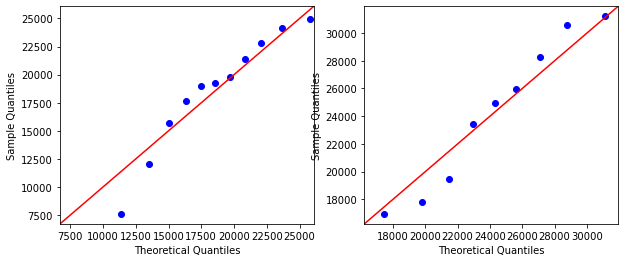

In [11]:
Nonsmokers.sort_values()
Smokers.sort_values()
fig2,ax2=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sm.qqplot(Nonsmokers,line='45',loc=np.mean(Nonsmokers),scale=stdNonsmokers,ax=ax2[0])
sm.qqplot(Smokers,line='45',loc=np.mean(Smokers),scale=stdSmokers,ax=ax2[1])
plt.show()

Now let's run the statistical test using the student's t-test for independent samples. We will look at using the Python library SciPy (that we imported as stats) and statsmodels (that we imported as sm).  We will run the hypothesis test and look at the 95% CI of the difference in means between the samples.  

In [12]:
stats.ttest_ind(Nonsmokers,Smokers,equal_var=True)

Ttest_indResult(statistic=-2.41250244778529, pvalue=0.02673144417952557)

In [13]:
sm.stats.ttest_ind(Nonsmokers,Smokers,usevar='pooled')

(-2.41250244778529, 0.02673144417952557, 18.0)

In [14]:
cm=sm.stats.CompareMeans(sm.stats.DescrStatsW(Nonsmokers),sm.stats.DescrStatsW(Smokers))
print(cm.tconfint_diff(usevar='pooled'))

(-10680.385660789972, -737.3113089070039)


Let's look at the calculations. \
n − 1 is the number of degrees of freedom for each group, and the total sample size minus two (that is, n1 + n2 − 2) is the total number of degrees of freedom, which is used in significance testing.

18 dof, n1+n2-2 = 11+9-2=18

In [15]:
nA=len(Nonsmokers)
nB=len(Smokers)
print("The number of observations in the samples are: " + str(nA)+" and " +str(nB))
print("The standard deviation of the sampes are: "+ str(stdNonsmokers)+" and "+ str(stdSmokers))
print("The mean of the samples are: "+ str(np.mean(Nonsmokers)) +" and "+str(np.mean(Smokers)))
print("The varaince are the samples are: "+str(stdNonsmokers**2)+" and "+ str(stdSmokers**2))
print("The degrees of freedom are: "+ str(len(Nonsmokers)+len(Smokers)-2))

The number of observations in the samples are: 11 and 9
The standard deviation of the sampes are: 5213.449603059031 and 5328.331891877608
The mean of the samples are: 18575.81818181818 and 24284.666666666668
The varaince are the samples are: 27180056.763636366 and 28391120.750000004
The degrees of freedom are: 18


We will calculate a pooled estimate of the combined standard deviations, which is a weighted average of the two standard deviations, used when the variances are equivalent to each other \
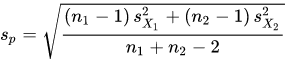

In [16]:
s_pooled=np.sqrt((((nA-1)*stdNonsmokers**2)+((nB-1)*stdSmokers**2))/(nA+nB-2))
print("The pooled standard error is:  "+str(s_pooled))

The pooled standard error is:  5264.817890890664


The t statistic to test whether the means are different can be calculated as follows: \
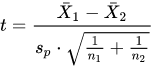

In [17]:
StandErrorDiff=s_pooled*(np.sqrt(1/11+1/9))
print("The standard error of the difference is: "+str(StandErrorDiff))

The standard error of the difference is: 2366.3596652883343


In [18]:
print("The differene in means is:" + str(np.mean(Nonsmokers)-np.mean(Smokers)))

The differene in means is:-5708.848484848488


In [19]:
# The t test statistic
-5708.849/(2366.360)

-2.412502324244832

To find the critical t value using a t table, find the t-value at dof=18 and at 1-alpha/2 = 0.975 = 0.025 = 2.101

In [20]:
Critical_t=stats.t.ppf(0.975,18)
print(Critical_t)

2.10092204024096


Since the absolute value of our test statistic is greater than the critical t, then we know that the difference in means is statistically significnat at alpha = 0.05.

To find the p-value, we can work backwards from a t-table at the t test statistic.
Find the t-value using dof=18 of 2.4125 on the t-table and find the area under the curve.  This would be betweeen p= 0.025 and p=0.01 (closer to 0.01).  Since this is a two-sided test, we need to double this to p-value = 0.02 to 0.05. The exact p-value is 

In [21]:
stats.t.cdf(-2.4125,18)

0.01336578935158508

In [22]:
2*(stats.t.cdf(-2.4125,18))

0.02673157870317016

The p-value=0.027 is less than p=0.05 (our alpha level), so we are confident to reject the null hypothesis (null hypothesis = that there is no true differnce in the means of our samples or that the difference means of the samples = 0).  We therefor accept the alternative hypotheiss and state that there is a significant different in the means.  

# 95% Confidence Interval of the Difference in Means

equation for 95% CI: 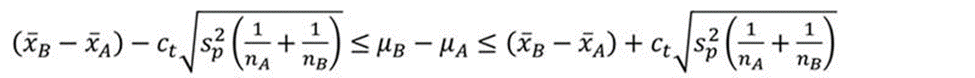

In [23]:
LB=(np.mean(Nonsmokers)-np.mean(Smokers)) - Critical_t*s_pooled* (np.sqrt(1/11 + 1/9))
UB=(np.mean(Nonsmokers)-np.mean(Smokers)) + Critical_t*s_pooled* (np.sqrt(1/11 + 1/9))
print(LB)
print(UB)

-10680.38566078997
-737.3113089070048


Interpretation:  The 95%CI of difference in means is = (-10680.386 to-737.31).  The confidence interval for meanA-meanB (the difference in sample means) does not cross 0 and has a negative range of values.  If the CI crossed 0 then no difference would be within the plausible values of the true diffenece in means and it would be a non-significnat finding.  Our results show that mean A is smaller than mean B, and that the difference in means is statistically significant at the 95% confidence level, with p=0.027.  

Note:  It is of note that if 2 seperate CIs, each from one sample, do overlap, then you could still have a significant t-test stating that the differnece in the means is significantly different (rare but possible), but if the CIs of the samples do not overlap then the difference in means will be significant.  In general, you want to test the difference in means between the samples.  

# 2 sample test for the Difference in Means, Unequal Variances

Note:  you will not have to do these calculations by hand.  But in general, this is what you would run for all 2 sample tests: the Welch's t-test.  

Exmaple:  Arsenic concentration in public drinking water supplies is a potential health risk. A water-treatment wroker tests the drinking water arsenic concentrations in parts per billion (ppb) for 10 urban communities and 10 rural communities in Ontario.  The data is provided.  Find out if there is any differnece in mean arsenic concentrations between urban and rural community drinking water.  

In [24]:
Urban=pd.Series([3,7,25,10,15,6,12,25,15,7])
Rural=pd.Series([48,44,40,38,33,21,20,12,1,18])

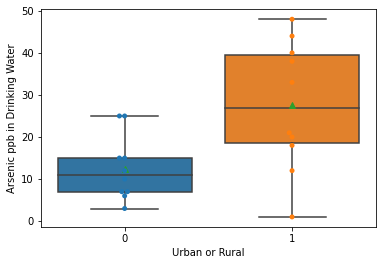

In [25]:
# Plot the data to visualize
ax=sns.boxplot(data=[Urban,Rural],showmeans=True)
ax.set(xlabel="Urban or Rural")
ax.set(ylabel="Arsenic ppb in Drinking Water")
ax=sns.swarmplot(data=[Urban,Rural])

C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


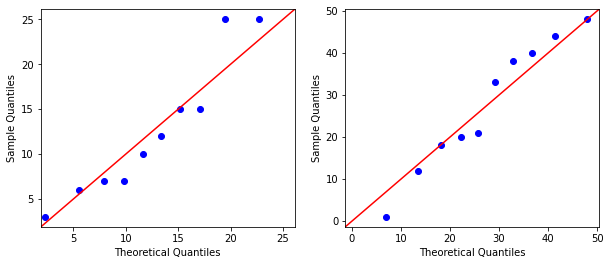

In [26]:
# Check normality
Urban.sort_values()
Rural.sort_values()
fig2,ax2=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sm.qqplot(Urban,line='45',loc=np.mean(Urban),scale=np.std(Urban,ddof=1),ax=ax2[0])
sm.qqplot(Rural,line='45',loc=np.mean(Rural),scale=np.std(Rural,ddof=1),ax=ax2[1])
plt.show()

In [27]:
stats.shapiro(Urban)

ShapiroResult(statistic=0.8936105370521545, pvalue=0.18614982068538666)

In [28]:
# Check for equal variance 
stats.levene(Urban,Rural,center='median')

LeveneResult(statistic=7.7015516672169, pvalue=0.012482954069299166)

Here the Levene's test states that we reject the null hypothesis that the Varinaces are equal for the two samples, so we accept the alternative hypothesis that they are different. So we need to use the t-test for independent samples to test for a difference beween means with samples with unequal variances. 

Parameter of interest:  the ppulation means for the two areas in Ontario, urban versus rural \
The hypothesis:  H0:  $\mu1-\mu2=0$; or H0: $\mu1=\mu2$ \
                 HA: $\mu1 \neq \mu2$ \
The test statistic:  Calculate test statistic for t-test with inequal variances
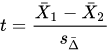 where 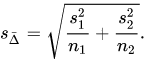 \
The dof = 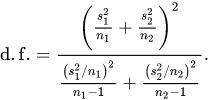, where you round round to the nearest interger to find the degrees of freedom.  Here dof=13.2 ~ 13. \
The critical value of t at df=13 and alpha=0.05 is 

In [29]:
stats.ttest_ind(Urban,Rural,equal_var=False)

Ttest_indResult(statistic=-2.7669395785560558, pvalue=0.015827284816100885)

In [30]:
# critical value of t at df=13 and alpha = 0.05 for a two-sided test.
stats.t.ppf(0.975,13)

2.1603686564610127

Since the absoulte value of the test statistic is as extreme or more extreme than the critical t value, we know it is a significnat result.

From the t-table we know that the p-value for a test statistic with 13 dof of 2.767 is between 0.01 and 0.005, which doubling is between 0.02 and 0.01.  Our exact p-value was found to be 0.016, so we reject the null hypotheiss and accept the alternative hypothesis that the mean arsenic cocentration in drinking water in Urban Ontario is different than the mean arsenic concentration in drinking water in rural Ontario.

equation for the 95% CI unequal variances \

Mean observed difference = 12.5-17.5 = -15 ppb

In [31]:
np.mean(Urban) - np.mean(Rural)

-15.0

In [32]:
# The 95% CI; note that it does not include 0.
cm=sm.stats.CompareMeans(sm.stats.DescrStatsW(Urban),sm.stats.DescrStatsW(Rural))
print(cm.tconfint_diff(usevar='unequal'))

(-26.694067105436396, -3.3059328945636057)


# Paired t-test

A researcher is developing a new drug delivery method (novel Method = B) for a well-established existing drug (typically delivered via Method A). They measured the uptake of the drug using Method A in 10 different lab mice waited several days for the drug to leave the mice’s system and then administered the drug in the alternate form (Method B) and once again measured the uptake. Knowing you’re on your way to becoming pro statisticians, they give you a conveniently formatted csv and ask you to help analyze their results.

A) Is a two-sample test or a paired test more appropriate? Why?

A paired test is more suitable because we have variability in common between our test pairs (aka the mice). We want to cancel the variability by running the paired test on each mouse.

B) Based on your decision, calculate the 95% confidence interval for the difference $μ_B-μ_A$

C) Interpret the confidence interval and make a conclusion for the researcher

In [92]:
data = pd.read_csv("PairedTTestTutorial.csv")
print(data)

   Unnamed: 0          A          B
0           0  -3.662886  -3.422549
1           1   8.306399  10.591479
2           2   6.819711   6.130886
3           3   9.757578  10.192032
4           4  11.494306  15.299046
5           5   8.937047   9.338760
6           6  11.902184  13.513236
7           7  14.772088  15.750661
8           8   9.361552  13.113879
9           9   9.268911   9.106832


In [93]:
A = data['A']
B = data['B']

In [94]:
# The differnces
diff = B - A
print(diff)

0    0.240337
1    2.285079
2   -0.688826
3    0.434454
4    3.804739
5    0.401713
6    1.611052
7    0.978573
8    3.752327
9   -0.162080
dtype: float64


C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


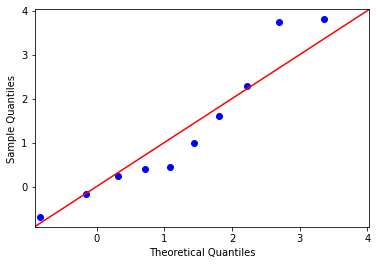

In [95]:
diff.sort_values()
sm.qqplot(diff,line='45',loc=np.mean(diff),scale=np.std(diff,ddof=1))
plt.show()

In [100]:
stats.shapiro(diff)

ShapiroResult(statistic=0.901043176651001, pvalue=0.22494257986545563)

In [96]:
# The mean difference
mean_diff = np.mean(diff)
std_diff= np.std(diff, ddof=1)
print(mean_diff)
print(std_diff)

1.26573684496122
1.5712138525224093


In [97]:
# critical t vaue using alpha=0.05 and df=9 for a two-sided test
Ct = stats.t.ppf(0.975,9)
print(Ct)

2.2621571627409915


In [98]:
LB = mean - Ct*std/np.sqrt(10)
UB = mean + Ct*std/np.sqrt(10)
print(str(LB) + " <= population mean difference <= " + str(UB))

0.14175816483096826 <= population mean difference <= 2.389715525091472


C) Since the CI does not span 0, we can conclude there is a statistically significant difference.

Let's compare the paired test to the two-sample test results below:

In [99]:
mean_b = np.mean(B)
mean_a = np.mean(A)
std_a = np.std(A, ddof=1)
std_b = np.std(B, ddof=1)
print(mean_b - mean_a)

1.2657368449612196


In [62]:
na = nb = 10
s_p = np.sqrt((((na-1)*std_a**2)+((nb-1)*std_b**2))/(na + nb -2))
print(s_p)

5.235192207806762


In [63]:
Ct = stats.t.ppf(0.975,18)
print(Ct)

2.10092204024096


In [64]:
# Difference in means
LB = (mean_b - mean_a) - Ct*s_p/np.sqrt(20)
UB = (mean_b - mean_a) + Ct*s_p/np.sqrt(20)
print(str(LB) + " <= mu_b - mu_a <= " + str(UB))

-1.1936541049009008 <= mu_b - mu_a <= 3.72512779482334


Analyzing the results as a two-sample test the results are not statistically significant as the confidence interval crosses zero. The variability that occurs in the individual mice is NOT cancelled out as is the case in the paried test. This large variability in turn propagates to the confidence interval resulting in large bounds even though the average difference is the same for both cases!

Paired t-test calculations.  \
You can use Python and scipy states stats.t-test realted to run a paired t test

The you can find the t-statistic for the mean difference using the stanadrd errror of the differences.  This is a one sample t-test where the $\mu$ is 0 for the new set of data (the differences)

In [65]:
#Python use scipy stats.t-test related
stats.ttest_rel(A,B)

Ttest_relResult(statistic=-2.5474643964264483, pvalue=0.03132478983040782)

In [68]:
t_paired= ((mean_diff)/(std_diff/np.sqrt(10)))
print(t_paired)

2.5474643964264483


You can find the p-value here by finding the probability of finding a t-value of 2.548 using alpha = 0.05 and a two-sided test.  This is betwee n p=0.01 and p=0.025 by the table for dof=9, so double this is p=0.02 to 0.05.  The exact p-value found was p=0.031, so we can reject the null hypothesis and accept that there is indeed a difference in the mean difference.  This agrees with the CI above, which it always will.   

# Non-parametric independent samples test

The effectiveness of advertising for two products (Brand X and Brand Y) was compared. Market research at a local shopping centre was carried out, with the participants being shown an advertizment for two brands of coffee, which they then rated on the overall likelihood of them buying the product (out of 10, with 10 being "definitely going to buy the product"). Half of the participants gave ratings for one of the products, the other half gave ratings for the other product. The data are a follows:

In [69]:
BrandX=pd.Series([8,7,6,2,5,8,7,3])
BrandY=pd.Series([9,9,7,8,10,8,6])

This data is ordinal and we are unceratin about the use of a parametric test of mean, so decide to use a Mann Whitney U test to test if the distribution are the same in the population.

Is there statistical evidence of a difference in ratings between the Brands?  

<AxesSubplot:>

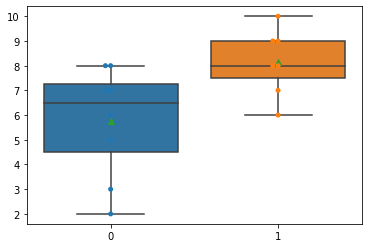

In [70]:
# explore the data
sns.boxplot(data=[BrandX,BrandY],showmeans=True)
sns.swarmplot(data=[BrandX,BrandY])

In [71]:
stats.mannwhitneyu(BrandX,BrandY,use_continuity=False,method='auto')

MannwhitneyuResult(statistic=9.5, pvalue=0.029839411362928826)

Set up the hypothesis:  \
H0:  the distributions of the populatoins from which the samples were drawn are equal.  In general, we can state that this is showing a difference in the medians of the smaples. \
HA: the distributions are not equal.

alpha=0.05

First, sort then rank all of the sample together.  For ties, assign a rank equal to the midpoint of the unadjusted rankings.

In [72]:
Ranks=pd.DataFrame([[8,7,6,2,5,8,7,3],[9,9,7,8,10,9,6]])
Rankssorted=pd.DataFrame([[2,3,5,6,7,7,8,8],[6,7,8,8,9,9,10]])
Rankssorted

,0,1,2,3,4,5,6,7
0,2,3,5,6,7,7,8,8.0
1,6,7,8,8,9,9,10,NaN


In [73]:
Ranksranked=pd.DataFrame([[1,2,3,4.5,7,7,10.5,10.5],[4.5,7,10.5,10.5,13.5,13.5,15]])
Ranksranked

,0,1,2,3,4,5,6,7
0,1.0,2,3.0,4.5,7.0,7.0,10.5,10.5
1,4.5,7,10.5,10.5,13.5,13.5,15.0,NaN


sum the ranks:  BrandX = 45.5; BrandY=74.5

Calculate the test statistic U: \
U1 = n1n2 +0.5n1(n1 +1)−R1 \
U2= n1n2 +0.5n2 (n2 +1)− R2

In [74]:
U1=8*7+0.5*8*(9)-45.5
U2=8*7+0.5*7*(8)-74.5
print(U1)
print(U2)

46.5
9.5


Use the smaller U value to compare with the critical U value at n1=8 and n2=7 at two-sided significance level=0.05.  Critical U=10. \
We reject the null hypothesis because 9.5<=10. To be significant, the test statistic U has to be equal to or less than the critical value.  We have shown that the populations of scores are not equal between the groups. 

# Non-parametric tests of paired samples:  Signed Rank Test 

H0:  The difference between pairs follows a symmetric distribution about 0; have the same distribution; medians are the same \
HA:  The differene between pairs does not follow a symetric distribution around 0

We fail to reject the null hypothesis and stats that there is not enough evidnece to state that there is a differnce in the dsitributions.  

In [75]:
BeforeTx=pd.Series([85,70,40,65,80,75,55,20])
AfterTx=pd.Series([75,50,50,40,20,65,40,25])

stats.wilcoxon(BeforeTx,AfterTx,alternative='two-sided')

WilcoxonResult(statistic=4.0, pvalue=0.0546875)

Order the paired differences, ignoring the sign of the difference \
Rank the paired differences and give them their sign \
Sum the signed ranks, and show the absolute value \
Smaller of these signed ranks is your test statitsic \
Lookup the T value in a Wicoxon signed rank table adn compare with test statistic \
If the test statistic is less than the T value, then reject the null hypothesis. 

In [86]:
Diff_Tx=(BeforeTx-AfterTx)
Diff_Tx

0    10
1    20
2   -10
3    25
4    60
5    10
6    15
7    -5
dtype: int64

C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


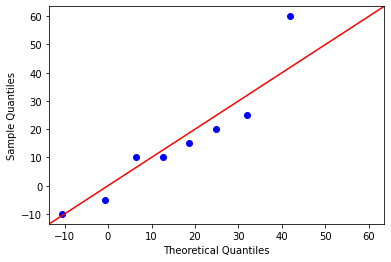

In [101]:
Diff_Tx.sort_values()
sm.qqplot(Diff_Tx,line='45',loc=np.mean(Diff_Tx),scale=np.std(Diff_Tx,ddof=1))
plt.show()

In [102]:
stats.shapiro(Diff_Tx)

ShapiroResult(statistic=0.9009402394294739, pvalue=0.2946343719959259)

In [88]:
Ordered_Diff=(-5,-10,10,10,15,20,25,60)
Ranked_Diff_with_Signs=(-1,-3,3,3,5,6,7,8)
Sum_Ranks_Neg= 4
Sum_Rnaks_Pos=32

Signed_ranks=4 \
The T value in the table is 3 at dof=8 and alpha = 0.05.  Since 4 is not less than 3, we cannot reject the null hypotheiss and state that the distributions have not been shown to be significantly different.  

# Power and Sample Size